In [1655]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import calendar
import time
import math

%matplotlib notebook

df = pd.DataFrame.from_records(pd.read_json('data/minute/amzn.json')['candles'])

<IPython.core.display.Javascript object>


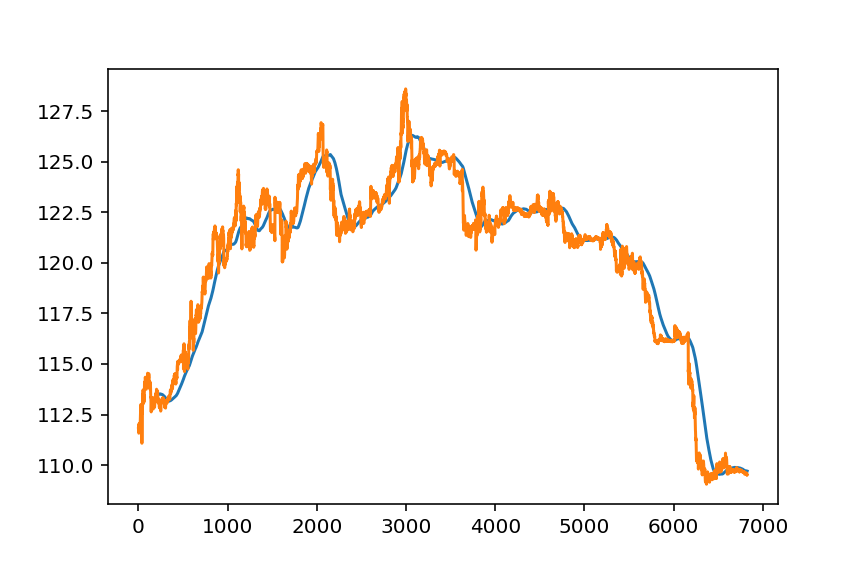

In [1572]:
x=[]
n=200
for i in range(len(df)-n):
    x+=[sum(df['low'][i:i+n])/n]
plt.plot([*range(n,len(df['low']))],x)
plt.plot(df['low'][:])

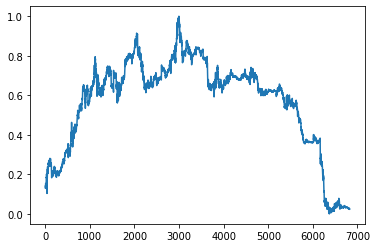

In [1574]:
def normalize(v):
    p=[]
    m=max(v)
    n=min(v)
    d=m-n
    for i in range(len(v)):
        p.append((v[i]-n)/d)
    return p

vl=normalize(df['low'])
vh=normalize(df['high'])
plt.plot(vl)

In [1575]:
# Gives local min for intervals of n time slots ahead
# O(n)

def findMin(x,v,n):
    i=0
    m=v[i]
    c=0
    index=[]
    value=[]
    for j in range(len(v)-1):
        if v[j+1]>=m:
            c+=1
            if c==n:
                value.append(m)
                index.append(x[i])
                m=v[j+1]
                i=j+1
                c=0
        else:
            c=0
            m=v[j+1]
            i=j+1
            
    for j in range(n-1):
        low=True
        if v[len(v)-1]>v[len(v)-j-2]:
            low=False
    if low==True:
        value.append(v[len(v)-1])
        index.append(x[len(v)-1])
    return index,value

In [1576]:
# Gives local max for intervals of n
def findMax(x,v,n):
    i=0
    m=v[i]
    c=0
    index=[]
    value=[]
    for j in range(len(v)-1):
        if v[j+1]<=m:
            c+=1
            if c==n or j+1==len(v)-1:
                value.append(m)
                index.append(x[i])
                m=v[j+1]
                i=j+1
                c=0
        else:
            c=0
            m=v[j+1]
            i=j+1
            
    for j in range(n-1):
        high=True
        if v[len(v)-1]<v[len(v)-j-2]:
            high=False
    if high==True:
        value.append(v[len(v)-1])
        index.append(x[len(v)-1])
    return index,value

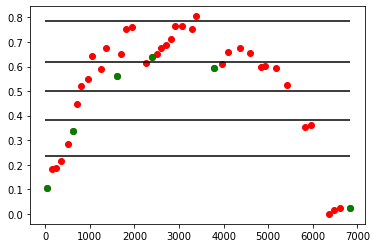

In [1582]:
x,y=findMin(range(len(vl)),vl,int(len(vl)/75))
x2,y2=findMin(x,y,5)

plt.scatter(x,y,c='r')
plt.scatter(x2,y2,c='g')

plt.plot()
plt.hlines(.236, 0, len(vh), 'black', '-')
plt.hlines(.382, 0, len(vh), 'black', '-')
plt.hlines(.50, 0, len(vh), 'black', '-')
plt.hlines(.618, 0, len(vh), 'black', '-')
plt.hlines(.786, 0, len(vh), 'black', '-')

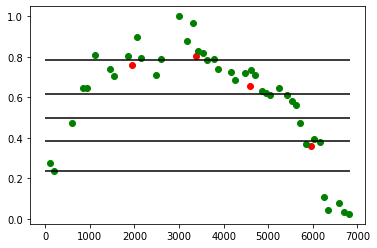

In [1583]:
xh,yh=findMax(range(len(vh)),vh,int(len(vh)/75))
x,y=findMax(x,y,5)

plt.scatter(x,y,c='r')
plt.scatter(xh,yh,c='g')
plt.hlines(.236, 0, len(vh), 'black', '-')
plt.hlines(.382, 0, len(vh), 'black', '-')
plt.hlines(.50, 0, len(vh), 'black', '-')
plt.hlines(.618, 0, len(vh), 'black', '-')
plt.hlines(.786, 0, len(vh), 'black', '-')

In [1581]:
xl,yl=findMin(range(len(vl)),vl,int(len(vh)/75))
xh,yh=findMax(range(len(vh)),vh,int(len(vh)/75))
print(len(xl))
print(len(xl))

41
41


In [1584]:
#O(n+m)

def zipp(lv,hv,liv,hiv,p):
    c=0
    v=[]
    vi=[]
    li=0
    hi=0
    m=0
    counter = 0
    while li<len(lv) and hi<len(hv):
        m=li
        while liv[li]<hiv[hi]:
            if lv[m]-lv[li]>-p:
                m=li
            li+=1
        v.append(lv[m])
        vi.append(liv[m])

        m=hi
        while hiv[hi]<liv[li]:
            if hv[m]-hv[hi] < p:
                m=hi
            hi+=1
            if hi>=len(hv):
                break
        if hi>=len(hv):
            break
        v.append(hv[m])
        vi.append(hiv[m])
    return vi,v

In [1585]:
#O(n)

def unzipp(x,y):
    lv=[]
    hv=[]
    liv=[]
    hiv=[]
    for i in range(len(x)):
        if i%2==0:
            liv.append(x[i])
            lv.append(y[i])
        else:
            hiv.append(x[i])
            hv.append(y[i])  
    return lv,hv,liv,hiv

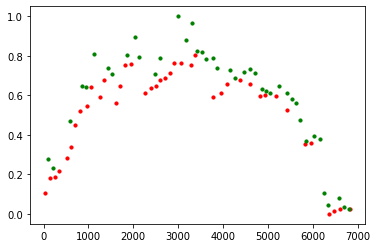

In [1586]:
plt.scatter(xl,yl,s=10,c='r')
plt.scatter(xh,yh,s=10,c='g')

In [1595]:
X,Y=zipp(yl,yh,xl,xh,0.03)
ylow,yhigh,xlow,xhigh=unzipp(X,Y)

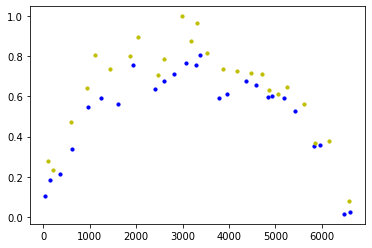

In [1596]:
plt.scatter(xlow,ylow,s=10,c='b')
plt.scatter(xhigh,yhigh,s=10,c='y')

In [1597]:
def findInc(vec,x,y,change,daysbefore):
    v=[]
    vi=[]
    startendx=[]
    startendy=[]

    veci=[*range(len(vec))]
    for i in range(1,len(x)-1):
        if y[i+1]-y[i]>=change:
            n=x[i]+1
            m=n-daysbefore
            if m<0:
                m=0
            v.append(vec[m:n])
            vi.append(veci[m:n])
            startendx.append([x[i],x[i+1]])
            startendy.append([y[i],y[i+1]])
    return v,vi,startendx,startendy

def findDec(vec,x,y,change,daysbefore):
    v=[]
    vi=[]
    startendx=[]
    startendy=[]
    
    veci=[*range(len(vec))]
    for i in range(1,len(x)-1):
        if y[i+1]-y[i]<=change:
            n=x[i]+1
            m=n-daysbefore
            if m<0:
                m=0
            v.append(vec[m:n])
            vi.append(veci[m:n])
            startendx.append([x[i],x[i+1]])
            startendy.append([y[i],y[i+1]])
    return v,vi,startendx,startendy

In [1699]:
def connect_patterns(patterns):
    result = []
    temp = []
    for j in patterns:
        if len(j) < 750:
            for k in j:
                temp.append(k)
        else:
            result.append(j)
        if len(temp) > 750:
            result.append(temp)
            temp = []
    return result

In [ ]:
incy,incx,incsex,incsey=findInc(vh,X,Y,0.025,1000)

<IPython.core.display.Javascript object>


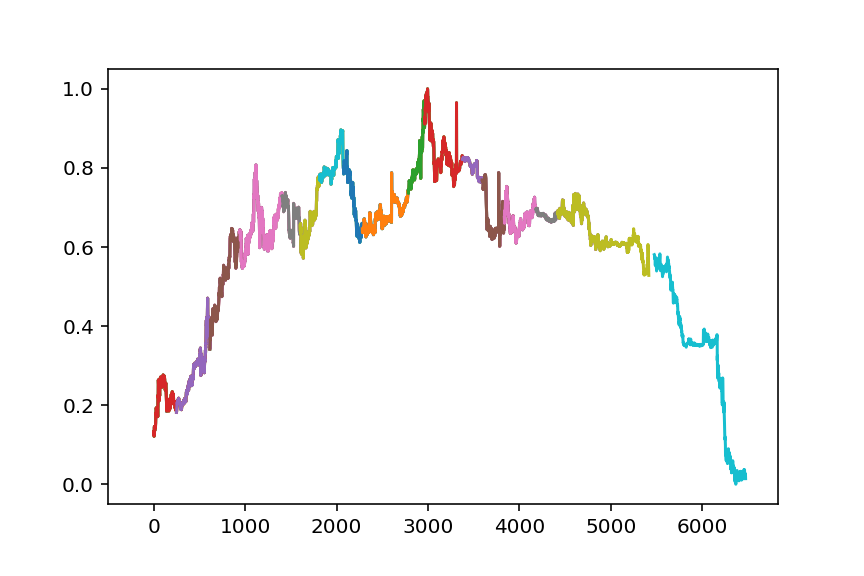

In [1667]:
for i in range(len(incy)):
    plt.plot(incx[i],incy[i])
    plt.xlim([-500, len(vl)])
    plt.ylim([-0.05, 1.05])

In [1700]:
pattern_scale_factor = 1
decy,decx,decsex,decsey=findDec(vl,X,Y,0.025,1000)

In [1701]:
decx = connect_patterns(decx)
decy = connect_patterns(decy)

<IPython.core.display.Javascript object>


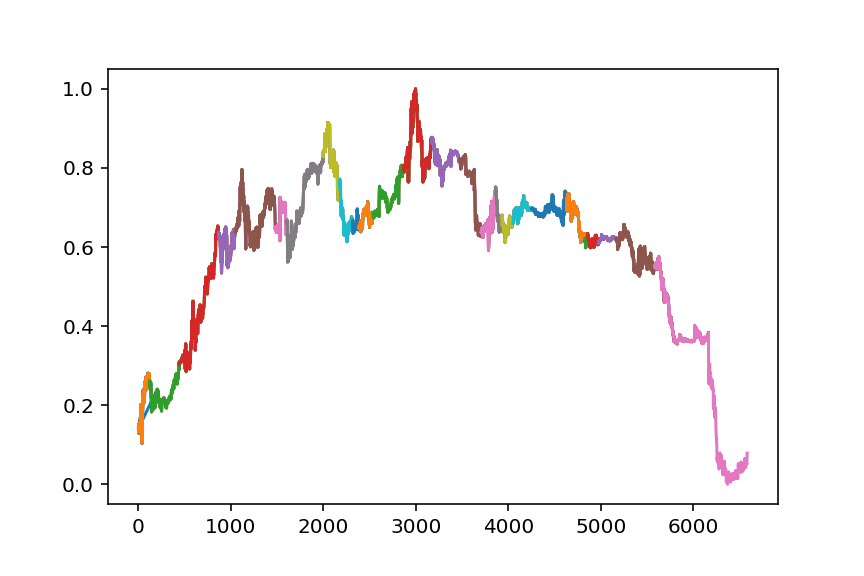

In [1704]:
for i in range(int(len(decy)/pattern_scale_factor)):
    plt.plot(decx[pattern_scale_factor*i], decy[pattern_scale_factor*i])
    plt.ylim([-0.05, 1.05])

In [1511]:
def Differences(v):
    d=[]
    for i in range(len(v)-1):
        d.append(v[i+1]-v[i])
    return d

diff=Differences(vl)
# plt.plot(diff)

In [1705]:
import umap.plot as uplt
import umap.umap_ as umap
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [1708]:
patterns = pd.DataFrame(decy)
patterns = patterns.drop(range(2)) # drop rows with NA values
patterns

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2,0.261196,0.260380,0.258027,0.247955,0.252531,0.250818,0.242357,0.240938,0.244249,0.251764,...,0.764315,0.764315,0.763267,0.759893,0.754090,0.757464,0.773645,0.784765,0.781084,0.795491
3,0.303016,0.301636,0.303553,0.304192,0.306339,0.306442,0.306442,0.306416,0.306084,0.306493,...,0.716948,0.720855,0.713797,0.721472,0.722554,0.725747,0.737748,0.729868,0.738037,0.746945
4,0.628809,0.637704,0.634112,0.621166,0.625537,0.623722,0.621738,0.620399,0.630317,0.635084,...,0.798594,0.798201,0.792047,0.796345,0.798083,0.793077,0.796702,0.799169,0.797853,0.803082
5,0.641616,0.636503,0.640337,0.641616,0.644172,0.641667,0.646728,0.641667,0.646702,0.641616,...,0.876789,0.881902,0.885736,0.899796,0.897239,0.897239,0.898517,0.898517,0.900588,0.914622
6,0.650920,0.644351,0.647699,0.651211,0.642587,0.645910,0.645910,0.645910,0.639277,0.641616,...,0.699259,0.704371,0.702806,0.700409,0.698262,0.699680,0.699387,0.704882,0.709893,0.714589
7,0.663075,0.657362,0.662065,0.668456,0.663471,0.653937,0.649284,0.623722,0.588318,0.562117,...,0.687628,0.687628,0.687628,0.687628,0.687628,0.682515,0.682515,0.677403,0.682515,0.713190
8,0.828643,0.838574,0.841769,0.840286,0.841564,0.841002,0.841002,0.841564,0.841564,0.844836,...,0.968814,0.972904,0.987219,0.987730,0.986324,0.976994,0.994376,0.996933,0.989264,1.000000
9,0.766437,0.771583,0.755394,0.762142,0.747741,0.755368,0.745038,0.752173,0.752901,0.749156,...,0.875767,0.862474,0.866564,0.864008,0.866564,0.871677,0.862986,0.861452,0.869121,0.877301
10,0.650026,0.659075,0.663382,0.667984,0.666526,0.649284,0.637973,0.634611,0.635634,0.638190,...,0.803170,0.804703,0.804703,0.802147,0.800102,0.800102,0.800102,0.802147,0.804703,0.804192
11,0.649284,0.646600,0.651380,0.651840,0.650959,0.654857,0.653476,0.648032,0.647648,0.651866,...,0.828732,0.834356,0.836401,0.841002,0.845092,0.841002,0.839980,0.836984,0.838446,0.804703


In [1709]:
reducer = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.5,
          local_connectivity=1.0, low_memory=False, metric='euclidean',
          metric_kwds=None, min_dist=0.05, n_components=2, n_epochs=100000,
          n_neighbors=2, negative_sample_rate=5, output_metric='euclidean',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

reducer2 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.5,
          local_connectivity=1.0, low_memory=False, metric='chebyshev',
          metric_kwds=None, min_dist=0.05, n_components=2, n_epochs=100000,
          n_neighbors=2, negative_sample_rate=5, output_metric='chebyshev',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

reducer3 = umap.UMAP(a=None, angular_rp_forest=False, b=None,
          force_approximation_algorithm=False, init='spectral', learning_rate=0.5,
          local_connectivity=1.0, low_memory=False, metric='manhattan',
          metric_kwds=None, min_dist=0.05, n_components=2, n_epochs=100000,
          n_neighbors=2, negative_sample_rate=5, output_metric='manhattan',
          output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
          set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
          target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
          transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [1710]:
reducer.fit(patterns)
embedding = reducer.transform(patterns)
assert(np.all(embedding == reducer.embedding_))

reducer2.fit(patterns)
embedding2 = reducer2.transform(patterns)
assert(np.all(embedding2 == reducer2.embedding_))

reducer3.fit(patterns)
embedding3 = reducer3.transform(patterns)
assert(np.all(embedding3 == reducer3.embedding_))

/Users/glush/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


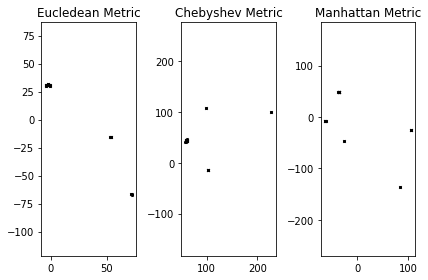

In [1711]:
plt.subplot(1, 3, 1)
plt.scatter(embedding[:, 0], embedding[:, 1], c='black', cmap='Spectral', s=5, marker='x')
plt.gca().set_aspect('equal', 'datalim')
plt.title('Eucledean Metric', fontsize=12)

plt.subplot(1, 3, 2)
plt.scatter(embedding2[:, 0], embedding2[:, 1], c='black', cmap='Spectral', s=5, marker='x')
plt.gca().set_aspect('equal', 'datalim')
plt.title('Chebyshev Metric', fontsize=12)

plt.subplot(1, 3, 3)
plt.scatter(embedding3[:, 0], embedding3[:, 1], c='black', cmap='Spectral', s=5, marker='x')
plt.gca().set_aspect('equal', 'datalim')
plt.title('Manhattan Metric', fontsize=12)

plt.tight_layout()

Interesting observation ^^ different distance measures result in different amount of pattern groups.

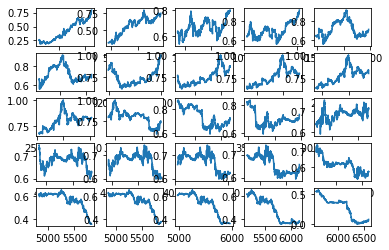

In [1716]:
for i in range(2, int(len(decy)/pattern_scale_factor)):
    plt.subplot(5, 5, i - 1)
    plt.plot(decx[pattern_scale_factor*i], decy[pattern_scale_factor*i])

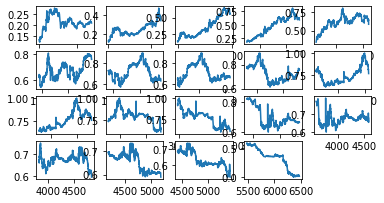

In [1718]:
for i in range(1, int(len(incy)/pattern_scale_factor)):
    plt.subplot(5, 5, i)
    plt.plot(incx[pattern_scale_factor*i], incy[pattern_scale_factor*i])